In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/1142TextMining/

Mounted at /content/drive
/content/drive/My Drive/1142TextMining


In [3]:
!unzip ./alice.zip

Archive:  ./alice.zip
replace readme.alice.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
import pandas as pd
alice=pd.read_csv('alice.txt',delimiter="\t",header=None)
alice

,0
0,ALICE'S ADVENTURES IN WONDERLAND
1,Lewis Carroll
2,THE MILLENNIUM FULCRUM EDITION 3.0
3,CHAPTER I. Down the Rabbit-Hole
4,Alice was beginning to get very tired of sitti...
...,...
2476,make THEIR eyes bright and eager with many a s...
2477,with the dream of Wonderland of long ago: and ...
2478,"all their simple sorrows, and find a pleasure ..."
2479,"remembering her own child-life, and the happy ..."


#30. 讀取詞性標註結果
編寫一個程式，從檔中讀取詞性標註結果。 對於每個句子，將其表示為一個包含多個映射對象的清單物件。 其中，每個詞作為映射物件，應具備以下屬性：

表層形態（即文本所用形態），對應鍵名;text
詞元（即詞的原形），對應鍵名;lemma
詞性，對應鍵名。pos
活用該程式以解決下列問題。

In [5]:
import nltk
nltk.download('stopwords') #停用詞
nltk.download('wordnet') #詞彙網路 同義詞
nltk.download('punkt_tab') #標點符號
nltk.download('averaged_perceptron_tagger_eng') #一般而言的詞性

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [6]:
stopwords=nltk.corpus.stopwords.words("english")
stemmer=nltk.stem.PorterStemmer()
lemmatizer=nltk.stem.WordNetLemmatizer() #lemma會盡可能把恢復成字典上有的字，stemming則會把文字
word_tokenizer=nltk.tokenize.regexp.WordPunctTokenizer #分句子
sent_segmenter=nltk.data.load("tokenizers/punkt/english.pickle")

In [7]:
nltk.pos_tag(["I","eat","an","apple","pie"])

[('I', 'PRP'), ('eat', 'VBP'), ('an', 'DT'), ('apple', 'NN'), ('pie', 'NN')]

In [8]:
alice['lemma']=None
alice['pos']=None

In [9]:
for index,i in enumerate(alice[0]):
  print(index,i)

0 ALICE'S ADVENTURES IN WONDERLAND
1 Lewis Carroll
2 THE MILLENNIUM FULCRUM EDITION 3.0
3 CHAPTER I. Down the Rabbit-Hole
4 Alice was beginning to get very tired of sitting by her sister on the
5 bank, and of having nothing to do: once or twice she had peeped into the
6 book her sister was reading, but it had no pictures or conversations in
7 it, 'and what is the use of a book,' thought Alice 'without pictures or
8 conversations?'
9 So she was considering in her own mind (as well as she could, for the
10 hot day made her feel very sleepy and stupid), whether the pleasure
11 of making a daisy-chain would be worth the trouble of getting up and
12 picking the daisies, when suddenly a White Rabbit with pink eyes ran
13 close by her.
14 There was nothing so VERY remarkable in that; nor did Alice think it so
15 VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
16 Oh dear! I shall be late!' (when she thought it over afterwards, it
17 occurred to her that she ought to have w

In [10]:
from nltk.tokenize import sent_tokenize
sent_segmenter = sent_tokenize

In [11]:
from nltk.tokenize import RegexpTokenizer
sent_segmenter = RegexpTokenizer(r'\w+')  # 只保留單詞

for index, i in enumerate(alice[0]):
  words = sent_segmenter.tokenize(i)  # 這次有傳入 `i`
  alice["lemma"][index]=[lemmatizer.lemmatize(word) for word in words]
  alice["pos"][index]=[nltk.pos_tag([word])[0][1] for word in words]

串流輸出內容已截斷至最後 5000 行。

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  alice["pos"][index]=[nltk.pos_tag([word])[0][1] for word in words]
<ipython-input-11-8652d8748631>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assig

In [12]:
alice.head()

,0,lemma,pos
0,ALICE'S ADVENTURES IN WONDERLAND,"[ALICE, S, ADVENTURES, IN, WONDERLAND]","[NN, NN, NNP, NN, NN]"
1,Lewis Carroll,"[Lewis, Carroll]","[NNP, NN]"
2,THE MILLENNIUM FULCRUM EDITION 3.0,"[THE, MILLENNIUM, FULCRUM, EDITION, 3, 0]","[DT, NN, NN, NN, CD, CD]"
3,CHAPTER I. Down the Rabbit-Hole,"[CHAPTER, I, Down, the, Rabbit, Hole]","[NN, PRP, IN, DT, NN, NN]"
4,Alice was beginning to get very tired of sitti...,"[Alice, wa, beginning, to, get, very, tired, o...","[NN, VBD, VBG, TO, VB, RB, VBN, IN, VBG, IN, P..."


#31. 動詞
提取出現在文字中所有的動詞（表層形態）。

In [13]:
alice_list =[]
for i in alice[0]:
  alice_list.append(i)
all = " ".join(alice_list)
all

'ALICE\'S ADVENTURES IN WONDERLAND Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3.0 CHAPTER I. Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, \'and what is the use of a book,\' thought Alice \'without pictures or conversations?\' So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so VERY remarkable in that; nor did Alice think it so VERY much out of the way to hear the Rabbit say to itself, \'Oh dear! Oh dear! I shall be late!\' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it 

In [14]:
from nltk import *
tokens=word_tokenize(all)
text=nltk.Text(tokens)
porter=nltk.PorterStemmer()
[porter.stem(t) for t in tokens]

['alic',
 "'s",
 'adventur',
 'in',
 'wonderland',
 'lewi',
 'carrol',
 'the',
 'millennium',
 'fulcrum',
 'edit',
 '3.0',
 'chapter',
 'i',
 '.',
 'down',
 'the',
 'rabbit-hol',
 'alic',
 'wa',
 'begin',
 'to',
 'get',
 'veri',
 'tire',
 'of',
 'sit',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'have',
 'noth',
 'to',
 'do',
 ':',
 'onc',
 'or',
 'twice',
 'she',
 'had',
 'peep',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'wa',
 'read',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictur',
 'or',
 'convers',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'alic',
 "'without",
 'pictur',
 'or',
 'convers',
 '?',
 "'",
 'so',
 'she',
 'wa',
 'consid',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'veri',
 'sleepi',
 'and',
 'stupid',
 ')',
 ',',
 'whether',
 'the',
 'pleasur',
 'of',
 'make',
 'a',
 'daisy-c

In [15]:
pos_list=[]
for i in nltk.pos_tag(tokens):
  pos_list.append(i[1])
pos_list

['NNP',
 'POS',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'CD',
 'NN',
 'PRP',
 '.',
 'RP',
 'DT',
 'JJ',
 'NNP',
 'VBD',
 'VBG',
 'TO',
 'VB',
 'RB',
 'JJ',
 'IN',
 'VBG',
 'IN',
 'PRP$',
 'NN',
 'IN',
 'DT',
 'NN',
 ',',
 'CC',
 'IN',
 'VBG',
 'NN',
 'TO',
 'VB',
 ':',
 'RB',
 'CC',
 'VB',
 'PRP',
 'VBD',
 'VBN',
 'IN',
 'DT',
 'NN',
 'PRP$',
 'NN',
 'VBD',
 'VBG',
 ',',
 'CC',
 'PRP',
 'VBD',
 'DT',
 'NNS',
 'CC',
 'NNS',
 'IN',
 'PRP',
 ',',
 'VB',
 'WP',
 'VBZ',
 'DT',
 'NN',
 'IN',
 'DT',
 'NN',
 ',',
 "''",
 'JJ',
 'NNP',
 'POS',
 'NNS',
 'CC',
 'NNS',
 '.',
 "''",
 'IN',
 'PRP',
 'VBD',
 'VBG',
 'IN',
 'PRP$',
 'JJ',
 'NN',
 '(',
 'RB',
 'RB',
 'IN',
 'PRP',
 'MD',
 ',',
 'IN',
 'DT',
 'JJ',
 'NN',
 'VBD',
 'PRP$',
 'JJ',
 'RB',
 'JJ',
 'CC',
 'JJ',
 ')',
 ',',
 'IN',
 'DT',
 'NN',
 'IN',
 'VBG',
 'DT',
 'NN',
 'MD',
 'VB',
 'IN',
 'DT',
 'NN',
 'IN',
 'VBG',
 'RP',
 'CC',
 'VBG',
 'DT',
 'NNS',
 ',',
 'WRB',
 'RB',
 'DT',
 'NNP',
 'NN',
 'IN',
 '

In [16]:
wnl=nltk.WordNetLemmatizer()
df=pd.DataFrame({"text":tokens,"lemma":[wnl.lemmatize(t) for t in tokens],"pos":pos_list})

In [17]:
df.head()

,text,lemma,pos
0,ALICE,ALICE,NNP
1,'S,'S,POS
2,ADVENTURES,ADVENTURES,NNP
3,IN,IN,NNP
4,WONDERLAND,WONDERLAND,NNP


In [18]:
df_v=df[df['pos'].str.contains('V')].reset_index()
df_v.head()

,index,text,lemma,pos
0,19,was,wa,VBD
1,20,beginning,beginning,VBG
2,22,get,get,VB
3,26,sitting,sitting,VBG
4,36,having,having,VBG


#32. 動詞原形
提取出現在文字中所有動詞的原形。

In [19]:
df_v['lemma']

,lemma
0,wa
1,beginning
2,get
3,sitting
4,having
...,...
5702,make
5703,bright
5704,feel
5705,find


#33. A of B
提取以“A of B”形式出現的短語，其中A與B均為名詞。

In [20]:
all_list = all.split()
m = [i for i,e in enumerate(all_list) if e=="of"]
m #錨點

[23,
 32,
 64,
 100,
 109,
 145,
 239,
 344,
 391,
 422,
 451,
 461,
 484,
 510,
 550,
 573,
 713,
 808,
 871,
 955,
 1079,
 1140,
 1164,
 1167,
 1193,
 1279,
 1289,
 1321,
 1408,
 1437,
 1611,
 1614,
 1761,
 1856,
 1859,
 1950,
 1964,
 1988,
 2098,
 2140,
 2200,
 2251,
 2334,
 2401,
 2477,
 2513,
 2542,
 2569,
 2623,
 2773,
 2789,
 2826,
 2904,
 2911,
 2987,
 3146,
 3162,
 3188,
 3255,
 3444,
 3462,
 3482,
 3607,
 3652,
 3659,
 3673,
 3719,
 3751,
 3789,
 3984,
 4025,
 4091,
 4096,
 4337,
 4445,
 4454,
 4556,
 4569,
 4614,
 4627,
 4717,
 4775,
 4789,
 4815,
 4928,
 5033,
 5060,
 5091,
 5096,
 5146,
 5236,
 5277,
 5442,
 5597,
 5685,
 5694,
 5731,
 5833,
 5970,
 6081,
 6164,
 6251,
 6289,
 6330,
 6418,
 6431,
 6517,
 6635,
 6667,
 6691,
 6724,
 6726,
 6731,
 6782,
 6803,
 6815,
 6940,
 6975,
 7021,
 7108,
 7122,
 7142,
 7187,
 7190,
 7317,
 7323,
 7341,
 7374,
 7380,
 7437,
 7558,
 7602,
 7622,
 7777,
 7794,
 7805,
 7868,
 7901,
 7929,
 7937,
 7965,
 8168,
 8183,
 8208,
 8263,
 8275,
 

In [21]:
for j in m:
  of_words=all_list[j-1:j+2]
  a=nltk.pos_tag(of_words)[0][1]
  b=nltk.pos_tag(of_words)[2][1]
  if a.startswith('NN') and b.startswith('NN'):
    print(of_words)

['plenty', 'of', 'time']
['saucer', 'of', 'milk']
['sort', 'of', 'way,']
['heap', 'of', 'sticks']
['row', 'of', 'lamps']
['beds', 'of', 'bright']
['book', 'of', 'rules']
['flavour', 'of', 'cherry-tart,']
['game', 'of', 'croquet']
['Pool', 'of', 'Tears']
['pair', 'of', 'boots']
['gallons', 'of', 'tears,']
['pattering', 'of', 'feet']
['sorts', 'of', 'things,']
['capital', 'of', 'Paris,']
['capital', 'of', 'Rome,']
['burst', 'of', 'tears,']
['pool', 'of', 'tears']
['way', 'of', 'speaking']
['knowledge', 'of', 'history,']
['subject', 'of', 'conversation.']
['sorts', 'of', 'things--I']
['half', 'of', 'them--and']
['question', 'of', 'course']
['person', 'of', 'authority']
['earls', 'of', 'Mercia']
['earls', 'of', 'Mercia']
['archbishop', 'of', 'Canterbury,']
['meaning', 'of', 'half']
['sort', 'of', 'circle,']
['deal', 'of', 'thought,']
['pictures', 'of', 'him),']
['chorus', 'of', 'voices']
['SHE,', 'of', "course,'"]
['box', 'of', 'comfits,']
['think', 'of', 'anything']
['pattering', 'of', 'f

#34.名詞序列
提取由連續名詞組成的序列中最長的一個。

#35. 詞頻
獲取所有單詞的清單及其出現的頻率數值，按詞頻對單詞進行降序排序

In [36]:
from collections import Counter
import nltk
nltk.download('punkt')
all_words = []
# 遍歷所有行中的詞形還原結果
for index, sentence in enumerate(alice['lemma']):
    all_words.extend(sentence)  # 添加每個句子中的單詞
# 使用 Counter 計算單詞頻率
word_counts = Counter(all_words)
# 按照頻率排序，降序排列
sorted_word_counts = word_counts.most_common()
# 顯示排序後的單詞和頻率
for word, count in sorted_word_counts:
    print(f"{word}: {count}")


the: 1527
a: 861
and: 802
to: 725
it: 583
I: 543
she: 509
of: 500
said: 456
Alice: 395
in: 356
wa: 352
you: 345
that: 275
her: 243
t: 216
at: 202
s: 194
on: 189
had: 177
with: 176
all: 173
be: 145
for: 140
but: 133
not: 129
they: 129
very: 126
little: 125
so: 124
out: 116
this: 113
The: 108
he: 101
down: 99
up: 98
is: 97
one: 95
about: 94
his: 94
what: 93
them: 88
know: 88
like: 85
were: 85
went: 83
again: 83
herself: 83
thing: 80
if: 78
or: 76
thought: 76
time: 74
Queen: 74
could: 73
have: 73
then: 72
would: 70
no: 69
when: 69
do: 68
into: 67
And: 67
see: 66
there: 65
It: 64
off: 62
me: 61
King: 61
did: 60
head: 59
Turtle: 59
began: 58
m: 58
way: 57
can: 57
ll: 56
Mock: 56
say: 55
my: 55
Hatter: 55
Gryphon: 55
by: 54
go: 54
quite: 53
your: 53
an: 52
much: 51
don: 51
You: 51
think: 50
their: 50
voice: 50
some: 48
who: 48
now: 48
only: 47
more: 47
Rabbit: 45
looked: 45
just: 45
got: 45
get: 44
are: 44
first: 44
ve: 43
never: 42
What: 42
Duchess: 42
tone: 42
must: 41
which: 41
round: 41


#36. 出現頻率最高的10個詞
對出現頻率最高的10個詞及其頻率數值進行可視化（如繪製柱狀圖）。

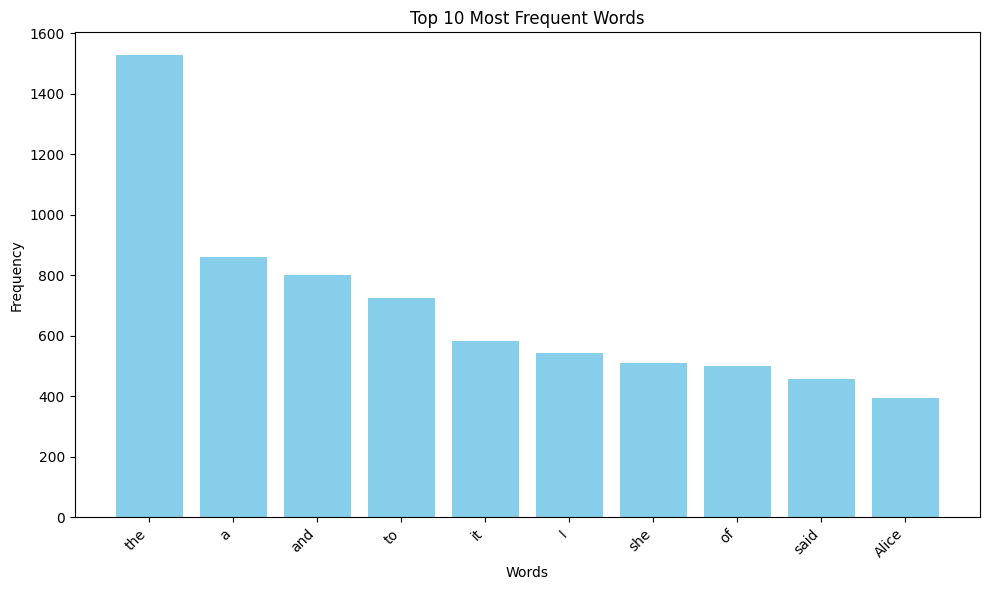

In [37]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
all_words = []
# 遍歷所有行中的詞形還原結果
for index, sentence in enumerate(alice['lemma']):
    all_words.extend(sentence)  # 添加每個句子中的單詞
# 使用 Counter 計算單詞頻率
word_counts = Counter(all_words)
# 按照頻率排序，獲取前 10 個最常見的單詞
top_10_words = word_counts.most_common(10)
# 提取單詞和對應的頻率
words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#37. 與『Alice』共現頻率最高的10個詞
提取所有與共同出現的詞。 對共現頻率最高的10個詞及其頻率數值進行可視化（如繪製柱狀圖）

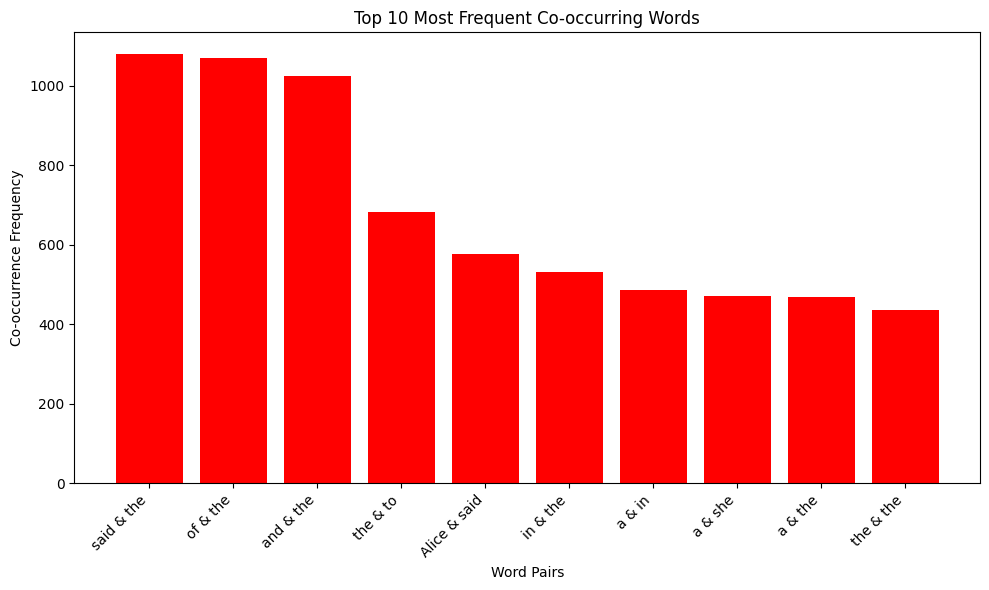

In [39]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
all_words = []
# 遍歷所有行中的詞形還原結果
for index, sentence in enumerate(alice['lemma']):
    all_words.extend(sentence)  # 添加每個句子中的單詞
# 計算共現頻率（共現矩陣）
window_size = 5  # 定義共現窗口大小，即在這個範圍內的單詞視為共現
co_occurrence = Counter()
# 迭代文本中的所有單詞，建立共現關係
for i in range(len(all_words) - window_size + 1):
    context = all_words[i:i + window_size]
    for j in range(len(context)):
        for k in range(j + 1, len(context)):
            word_pair = tuple(sorted([context[j], context[k]]))
            co_occurrence[word_pair] += 1
# 獲取共現頻率最高的10個詞對
top_10_co_occurrence = co_occurrence.most_common(10)
# 提取詞對和對應的頻率
word_pairs, counts = zip(*top_10_co_occurrence)
word_pairs = [' & '.join(pair) for pair in word_pairs]  # 連接詞對
plt.figure(figsize=(10, 6))
plt.bar(word_pairs, counts, color='red')
plt.xlabel('Word Pairs')
plt.ylabel('Co-occurrence Frequency')
plt.title('Top 10 Most Frequent Co-occurring Words')
plt.xticks(rotation=45, ha='right')  # 讓 x 軸標籤斜著顯示，防止重疊
plt.tight_layout()
plt.show()

#38. 直方圖
繪製詞頻直方圖，其中：

橫軸代表單詞的詞頻數值;
縱軸代表詞頻為的單詞種類總數

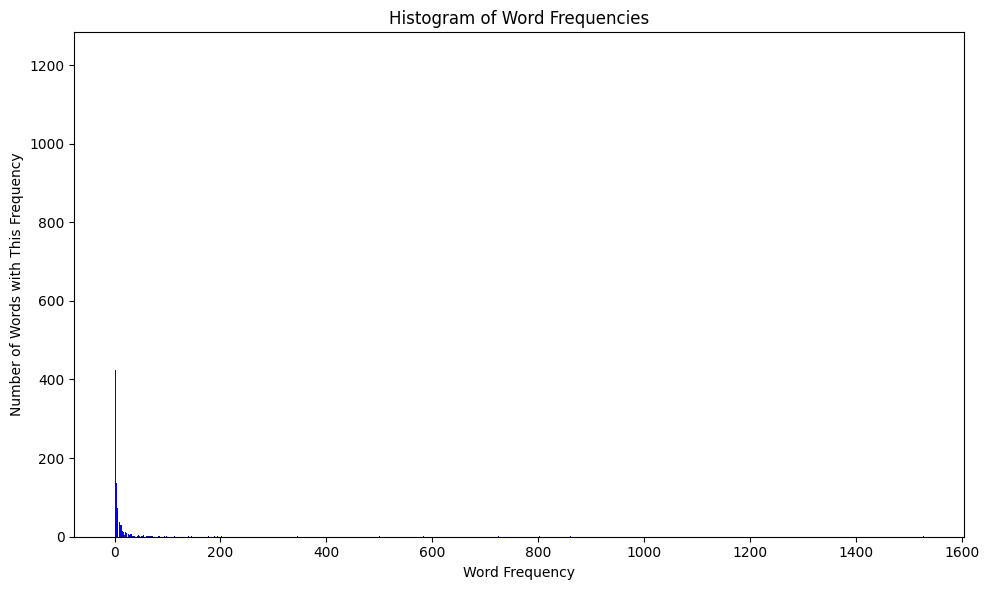

In [52]:
all_words = []
# 遍歷所有行中的詞形還原結果
for index, sentence in enumerate(alice['lemma']):
    all_words.extend(sentence)  # 添加每個句子中的單詞
word_counts = Counter(all_words)
# 只保留詞頻數字的列表
frequency_values = list(word_counts.values())
# 使用 Counter 計算每個頻率出現的單詞數量
frequency_counter = Counter(frequency_values)
plt.figure(figsize=(10, 6))
plt.bar(frequency_counter.keys(), frequency_counter.values(), color='blue')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words with This Frequency')
plt.title('Histogram of Word Frequencies')
#plt.ylim(0, 700)
#plt.xlim(0, 700)
plt.tight_layout()
plt.show()

#39. Zipf定律
按詞頻對所有單詞降序排序。 以此排名的名次為橫軸，各名次所對應的詞頻為縱軸，繪製雙對數座標圖

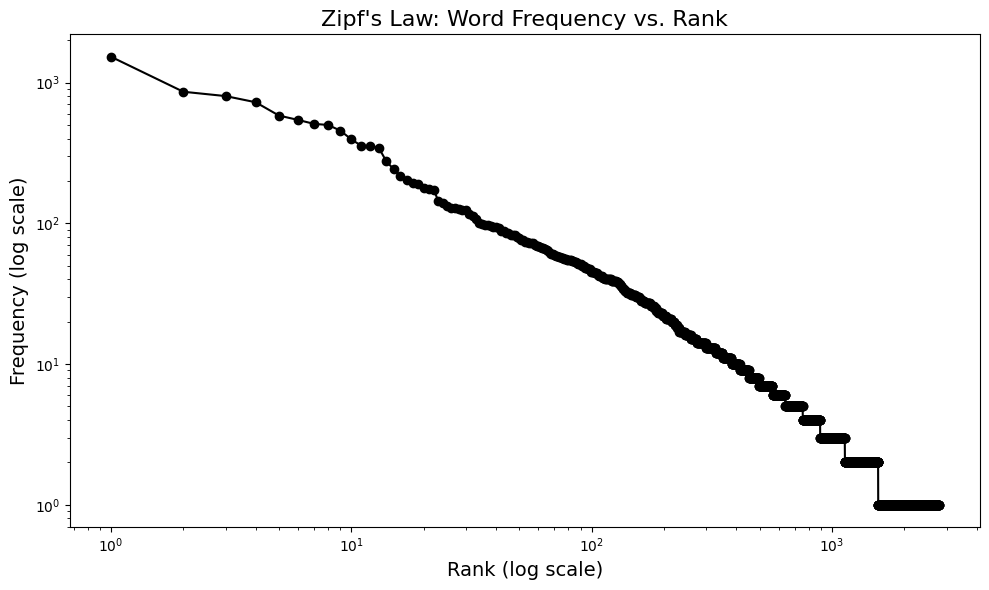

In [55]:
import numpy as np
all_words = []
for index, sentence in enumerate(alice['lemma']):
    all_words.extend(sentence)
word_counts = Counter(all_words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = [count for _, count in sorted_word_counts]
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='o', color='black')
plt.xlabel('Rank (log scale)', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)
plt.title('Zipf\'s Law: Word Frequency vs. Rank', fontsize=16)
plt.tight_layout()
plt.show()